# LOGISTIC with Chat GPT
> biceps

In [24]:
# Import the necessary modules
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import numpy as np

# Load the dataset into a pandas DataFrame
df = pd.read_csv('/Users/paoloartasensi/Python_Scripts/artabax/Gdrive_csv/20221227_0931PM_biceps.csv')

df.head()


,timestamp,ax,ay,az,gx,gy,gz,pitch,roll,BAR,totacc,status,mov,prob
0,1672172939737,-8.725057,-3.535049,2.941084,1.260000,-0.700000,0.700000,21.003533,-71.371820,0.064453,9.862716,0,static,0
1,1672172939847,-8.689131,-3.324287,2.933899,-0.420000,1.120000,3.779999,19.924309,-71.342662,0.059570,9.754980,0,static,0
2,1672172939957,-8.825647,-2.914739,2.936294,-0.350000,-11.689996,1.330000,17.399402,-71.597709,0.055908,9.747286,0,static,0
3,1672172940064,-8.818462,-2.991379,3.173401,-2.309999,-13.719995,9.799996,17.702050,-70.208287,0.073486,9.837891,0,static,0
4,1672172940173,-8.904683,-3.036885,3.142266,-13.019995,-18.059994,12.459995,17.828163,-70.563190,0.029297,9.919168,0,static,0


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1236 entries, 0 to 1235
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   timestamp  1236 non-null   int64  
 1   ax         1236 non-null   float64
 2   ay         1236 non-null   float64
 3   az         1236 non-null   float64
 4   gx         1236 non-null   float64
 5   gy         1236 non-null   float64
 6   gz         1236 non-null   float64
 7   pitch      1236 non-null   float64
 8   roll       1236 non-null   float64
 9   BAR        1236 non-null   float64
 10  totacc     1236 non-null   float64
 11  status     1236 non-null   int64  
 12  mov        1236 non-null   object 
 13  prob       1236 non-null   int64  
dtypes: float64(10), int64(3), object(1)
memory usage: 135.3+ KB


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# Select the columns containing the features
X = df[['ax', 'ay', 'az', 'gx', 'gy', 'gz','pitch','roll', 'BAR','totacc' ]]

# Select the column containing the labels (0 for non-rep, 1 for rep)
y = df['status']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a random forest classifier on the training data
model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))


from sklearn.metrics import accuracy_score, precision_score, recall_score
#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 92.34%
Accuracy: 0.9233870967741935
Precision: 0.8888888888888888
Recall: 0.8780487804878049


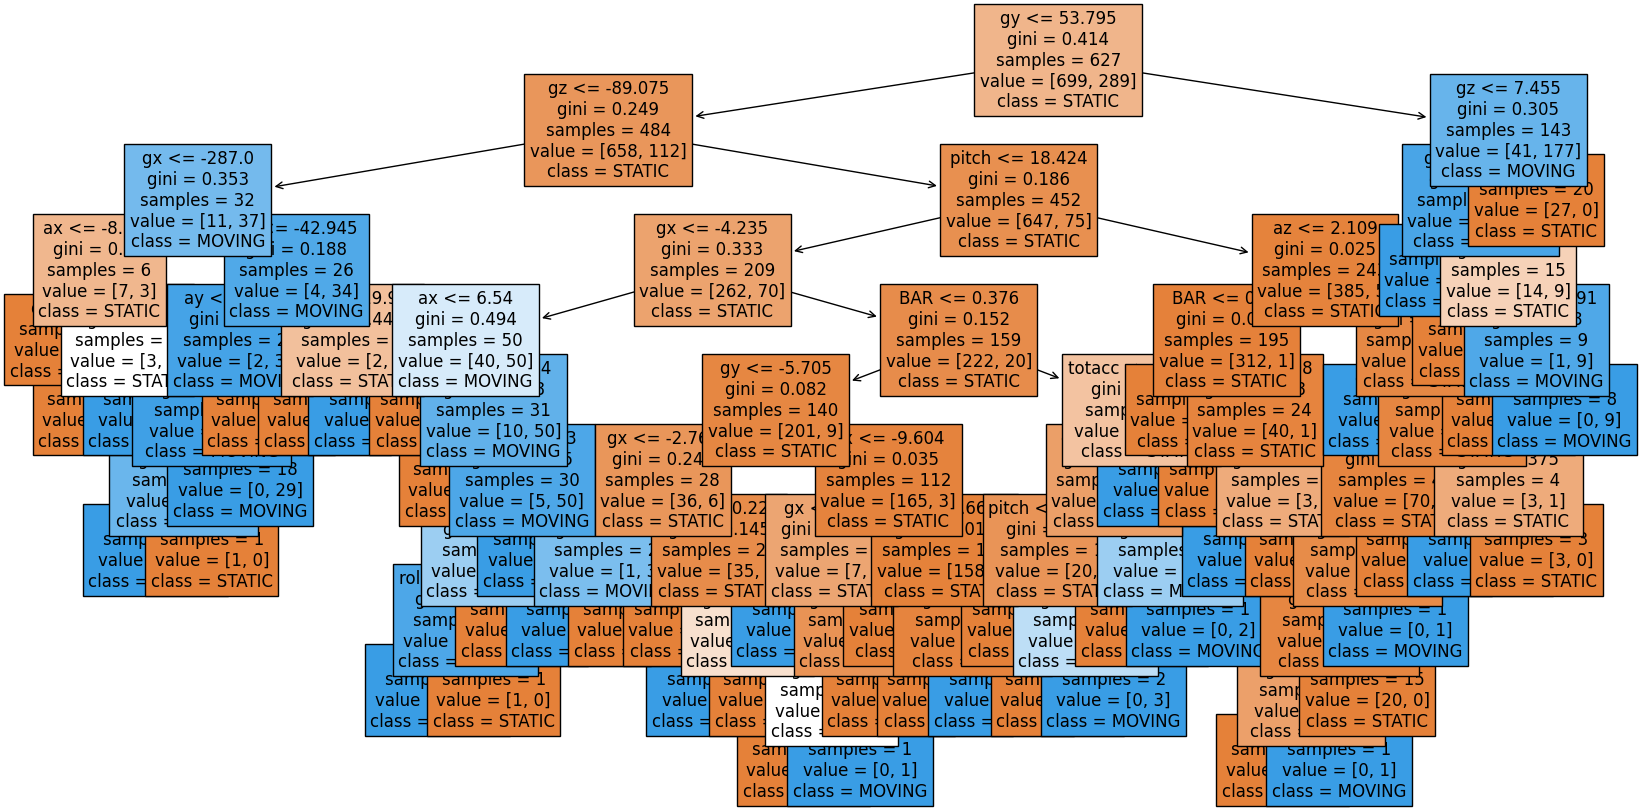

In [27]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Get the first decision tree in the random forest
tree = model.estimators_[0]
# Plot the decision tree
plt.figure(figsize=(20, 10))
plot_tree(tree, feature_names=X.columns, class_names=['STATIC', 'MOVING'], filled=True, fontsize=12)
plt.show()

# LOGISTIC REGRESSION

In [28]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=None)

# Train a logistic regression model on the training data
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Calculate the accuracy of the model
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy: {:.2f}%'.format(accuracy*100))

#Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)

print('Accuracy:', accuracy)
print('Precision:', precision)
print('Recall:', recall)


Accuracy: 88.31%
Accuracy: 0.8830645161290323
Precision: 0.9107142857142857
Recall: 0.68


> PESI

In [29]:
# Print the weights (coefficients) for each feature with their corresponding labels (feature names)
for feature, coef in zip(X.columns, model.coef_[0]):
    print('{}: {}'.format(feature, coef))
print("b0",model.intercept_)

ax: 0.04869802468052635
ay: 0.07629889863435525
az: -0.0230986055793312
gx: -0.008366496699681583
gy: 0.016038246642769746
gz: -0.015459615289212948
pitch: 0.05625216763081198
roll: 0.011232390437133286
BAR: 1.9021571763834144
totacc: -0.2716398554049533
b0 [-0.15695223]


In [ ]:
weights = 

## CONFUSION COLORED MATRIX

        Logistic
Reg             
BAR     1.902157
totacc  -0.27164
ay      0.076299
pitch   0.056252
ax      0.048698
az     -0.023099
gy      0.016038
gz      -0.01546
roll    0.011232
gx     -0.008366
b0: -0.15695222937896028


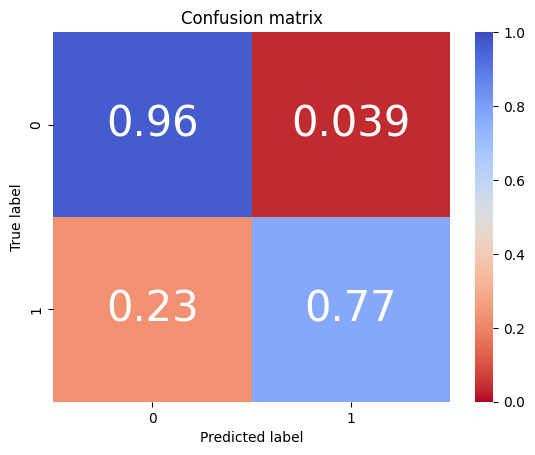

In [42]:
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss, precision_score, recall_score
import seaborn as sns


log_reg = LogisticRegression(random_state=None, solver = 'lbfgs', max_iter=1000)
log_reg.fit(X_train, y_train)

# predict - Predict class labels for samples in X
y_pred = log_reg.predict(X_train)

# coef_ - Coefficient of the features in the decision function
log_reg.coef_

intercept = str(model.intercept_)[1:-1]

lr = pd.DataFrame(data =[X_train.columns, np.array(log_reg.coef_[0]).tolist()]).T
lr.rename(columns={0:'Reg',1:'Logistic'}, inplace=True)
lr.set_index('Reg', inplace=True)
lr.sort_values(by='Logistic', key=abs, ascending=False , inplace=True)
print(lr)
print('b0:',log_reg.intercept_[0])


def plot_confusion_matrix(cm, classes=None, title='Confusion matrix'):
    """Plots a confusion matrix."""
    if classes is not None:
        sns.heatmap(cm, cmap="coolwarm_r", 
                    xticklabels=classes, 
                    yticklabels=classes, 
                    vmin=0., vmax=1., 
                    annot=True, annot_kws={'size':30}
                    )
    else:
        sns.heatmap(cm, vmin=0., vmax=1.)
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Visualizing cm

cm = confusion_matrix(y_train, y_pred)
cm_norm = cm / cm.sum(axis=1).reshape(-1,1)

plot_confusion_matrix(cm_norm, classes = log_reg.classes_, title='Confusion matrix')

LogReg Training Accuracy is:  0.9048582995951417
LogReg Testing Accuracy is:  0.8830645161290323


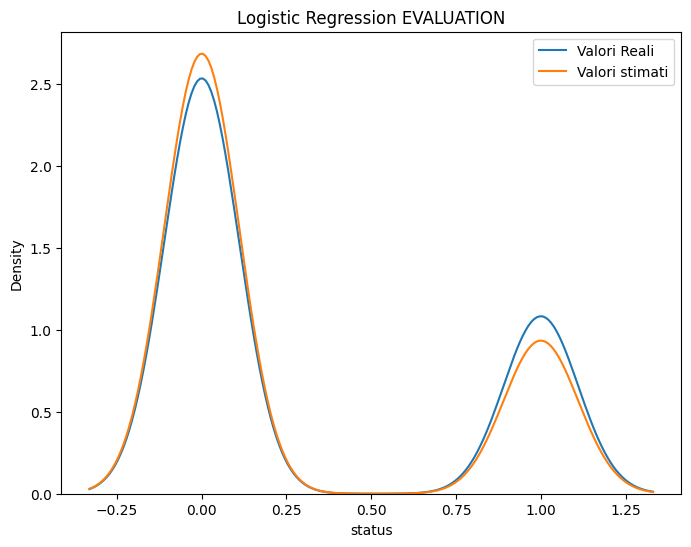

In [31]:
'''Logistic Regression EVALUATION'''

# Accuracy on Train
print("LogReg Training Accuracy is: ", log_reg.score(X_train, y_train))
# Accuracy on Test
print("LogReg Testing Accuracy is: ", log_reg.score(X_test, y_test))
# Classification Report

plt.figure(figsize=(8, 6))
plt.title('Logistic Regression EVALUATION')
sns.kdeplot(data=df, x='status' , label='Valori Reali')
sns.kdeplot(y_pred , label='Valori stimati')
plt.legend()
plt.show()

In [45]:
import csv

# Create a list of tuples to hold the feature names and coefficients
coefficients = []
for feature, coef in zip(X.columns, model.coef_[0]):
    coefficients.append((feature, coef))

# Append the intercept to the list of coefficients
coefficients.append(('intercept', intercept))

# Specify the full path to the directory where you want to save the file
directory = '/Users/paoloartasensi/Python_Scripts/artabax/Gdrive_csv/'

# Open a file for writing in 'w' mode (overwrites the file if it already exists)
with open(directory + 'coefficients.csv', 'w', newline='') as csvfile:
    # Create a CSV writer object
    writer = csv.writer(csvfile)

    # Write the header row
    writer.writerow(['feature', 'coefficient'])

    # Write the rows for the coefficients
    for feature, coef in coefficients:
        writer.writerow([feature, coef])
